In [35]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('bestsellers with categories.csv')

Вивести схему даних.

In [36]:
print("Схема даних:")
print(df.info())

Схема даних:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550 entries, 0 to 549
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Name         550 non-null    object 
 1   Author       550 non-null    object 
 2   User Rating  550 non-null    float64
 3   Reviews      550 non-null    int64  
 4   Price        550 non-null    int64  
 5   Year         550 non-null    int64  
 6   Genre        550 non-null    object 
dtypes: float64(1), int64(3), object(3)
memory usage: 30.2+ KB
None


Вивести назви стовпців і типи даних за допомогою dtypes

In [37]:
print("\nНазви стовпців та типи даних:")
print(df.dtypes)


Назви стовпців та типи даних:
Name            object
Author          object
User Rating    float64
Reviews          int64
Price            int64
Year             int64
Genre           object
dtype: object


Виведіть перші п'ять рядків (використовується метод head)

In [38]:
print("\nПерші п'ять рядків:")
print(df.head())


Перші п'ять рядків:
                                                Name  \
0                      10-Day Green Smoothie Cleanse   
1                                  11/22/63: A Novel   
2            12 Rules for Life: An Antidote to Chaos   
3                             1984 (Signet Classics)   
4  5,000 Awesome Facts (About Everything!) (Natio...   

                     Author  User Rating  Reviews  Price  Year        Genre  
0                  JJ Smith          4.7    17350      8  2016  Non Fiction  
1              Stephen King          4.6     2052     22  2011      Fiction  
2        Jordan B. Peterson          4.7    18979     15  2018  Non Fiction  
3             George Orwell          4.7    21424      6  2017      Fiction  
4  National Geographic Kids          4.8     7665     12  2019  Non Fiction  


Вивести перший рядок за допомогою first()

In [39]:
first_row = df.groupby(df.index).first()

print("Перший рядок даних:")
print(first_row)

Перший рядок даних:
                                                  Name  \
0                        10-Day Green Smoothie Cleanse   
1                                    11/22/63: A Novel   
2              12 Rules for Life: An Antidote to Chaos   
3                               1984 (Signet Classics)   
4    5,000 Awesome Facts (About Everything!) (Natio...   
..                                                 ...   
545       Wrecking Ball (Diary of a Wimpy Kid Book 14)   
546  You Are a Badass: How to Stop Doubting Your Gr...   
547  You Are a Badass: How to Stop Doubting Your Gr...   
548  You Are a Badass: How to Stop Doubting Your Gr...   
549  You Are a Badass: How to Stop Doubting Your Gr...   

                       Author  User Rating  Reviews  Price  Year        Genre  
0                    JJ Smith          4.7    17350      8  2016  Non Fiction  
1                Stephen King          4.6     2052     22  2011      Fiction  
2          Jordan B. Peterson          4.7 

Зробіть опис датасету за допомогою describe()

In [40]:
print("\nОпис датасету:")
print(df.describe())


Опис датасету:
       User Rating       Reviews       Price         Year
count   550.000000    550.000000  550.000000   550.000000
mean      4.618364  11953.281818   13.100000  2014.000000
std       0.226980  11731.132017   10.842262     3.165156
min       3.300000     37.000000    0.000000  2009.000000
25%       4.500000   4058.000000    7.000000  2011.000000
50%       4.700000   8580.000000   11.000000  2014.000000
75%       4.800000  17253.250000   16.000000  2017.000000
max       4.900000  87841.000000  105.000000  2019.000000


Виведіть список стовпців за допомогою columns()

In [41]:
print("\nСписок стовпців:")
print(df.columns.tolist())


Список стовпців:
['Name', 'Author', 'User Rating', 'Reviews', 'Price', 'Year', 'Genre']


Виведіть загальну кількість рядків даних за допомогою count()

In [42]:
row_count = df.count()
print("Загальна кількість рядків даних:", row_count)

Загальна кількість рядків даних: Name           550
Author         550
User Rating    550
Reviews        550
Price          550
Year           550
Genre          550
dtype: int64


Перевірте, чи у всіх рядків вистачає даних. Якщо є пропуски, замінить їх на NaN, потім тип даних на числовий.

In [43]:
if df.isnull().values.any():
    df.fillna(value=pd.np.nan, inplace=True)
    df = df.astype(float)

Замініть комірки з пропущеними значенями на середні за стовпцем. І тип даних на float.

In [44]:
numeric_columns = df.select_dtypes(include=['float64', 'int64']).columns
df[numeric_columns] = df[numeric_columns].fillna(df[numeric_columns].mean())

print("\nПерший рядок даних після заповнення пропущених значень середніми:")
print(df.head(1))

numeric_columns = df.select_dtypes(include=['float64', 'int64']).columns
df[numeric_columns] = df[numeric_columns].astype(float)

print("\nПерший рядок даних після конвертації типів даних:")
print(df.head(1))


Перший рядок даних після заповнення пропущених значень середніми:
                            Name    Author  User Rating  Reviews  Price  Year  \
0  10-Day Green Smoothie Cleanse  JJ Smith          4.7    17350      8  2016   

         Genre  
0  Non Fiction  

Перший рядок даних після конвертації типів даних:
                            Name    Author  User Rating  Reviews  Price  \
0  10-Day Green Smoothie Cleanse  JJ Smith          4.7  17350.0    8.0   

     Year        Genre  
0  2016.0  Non Fiction  


Змініть назви всіх колонок: назва з маленької букви, без пробілів через підкреслення.

In [45]:
df.rename(columns=lambda x: x.lower().replace(' ', '_'), inplace=True)
print(df.head())

                                                name  \
0                      10-Day Green Smoothie Cleanse   
1                                  11/22/63: A Novel   
2            12 Rules for Life: An Antidote to Chaos   
3                             1984 (Signet Classics)   
4  5,000 Awesome Facts (About Everything!) (Natio...   

                     author  user_rating  reviews  price    year        genre  
0                  JJ Smith          4.7  17350.0    8.0  2016.0  Non Fiction  
1              Stephen King          4.6   2052.0   22.0  2011.0      Fiction  
2        Jordan B. Peterson          4.7  18979.0   15.0  2018.0  Non Fiction  
3             George Orwell          4.7  21424.0    6.0  2017.0      Fiction  
4  National Geographic Kids          4.8   7665.0   12.0  2019.0  Non Fiction  


df.columns = ['name', 'author', 'user_rating', 'reviews', 'price', 'year', 'genre']

In [46]:
df.columns = ['name', 'author', 'user_rating', 'reviews', 'price', 'year', 'genre']

Знайдіть автора з найвищим рейтингом.

In [47]:
highest_rating_author = df[df['user_rating'] == df['user_rating'].max()]['author'].iloc[0]
print("\nАвтор з найвищим рейтингом:", highest_rating_author)


Автор з найвищим рейтингом: Bill Martin Jr.


Знайдіть автора з найнижчим рейтингом.

In [48]:
lowest_rating_author = df[df['user_rating'] == df['user_rating'].min()]['author'].iloc[0]
print("Автор з найнижчим рейтингом:", lowest_rating_author)

Автор з найнижчим рейтингом: J.K. Rowling


Знайдіть автора, що має найбільшу кількіть рецензій.

In [49]:
most_reviewed_author = df[df['reviews'] == df['reviews'].max()]['author'].iloc[0]
print("Автор з найбільшою кількістю рецензій:", most_reviewed_author)

Автор з найбільшою кількістю рецензій: Delia Owens


Побудуйте гістограму рейтингу 10 найкращих книг (відібрати книги з найбільшим рейтингом).

<ipython-input-59-2b337f8f98bf>:11: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


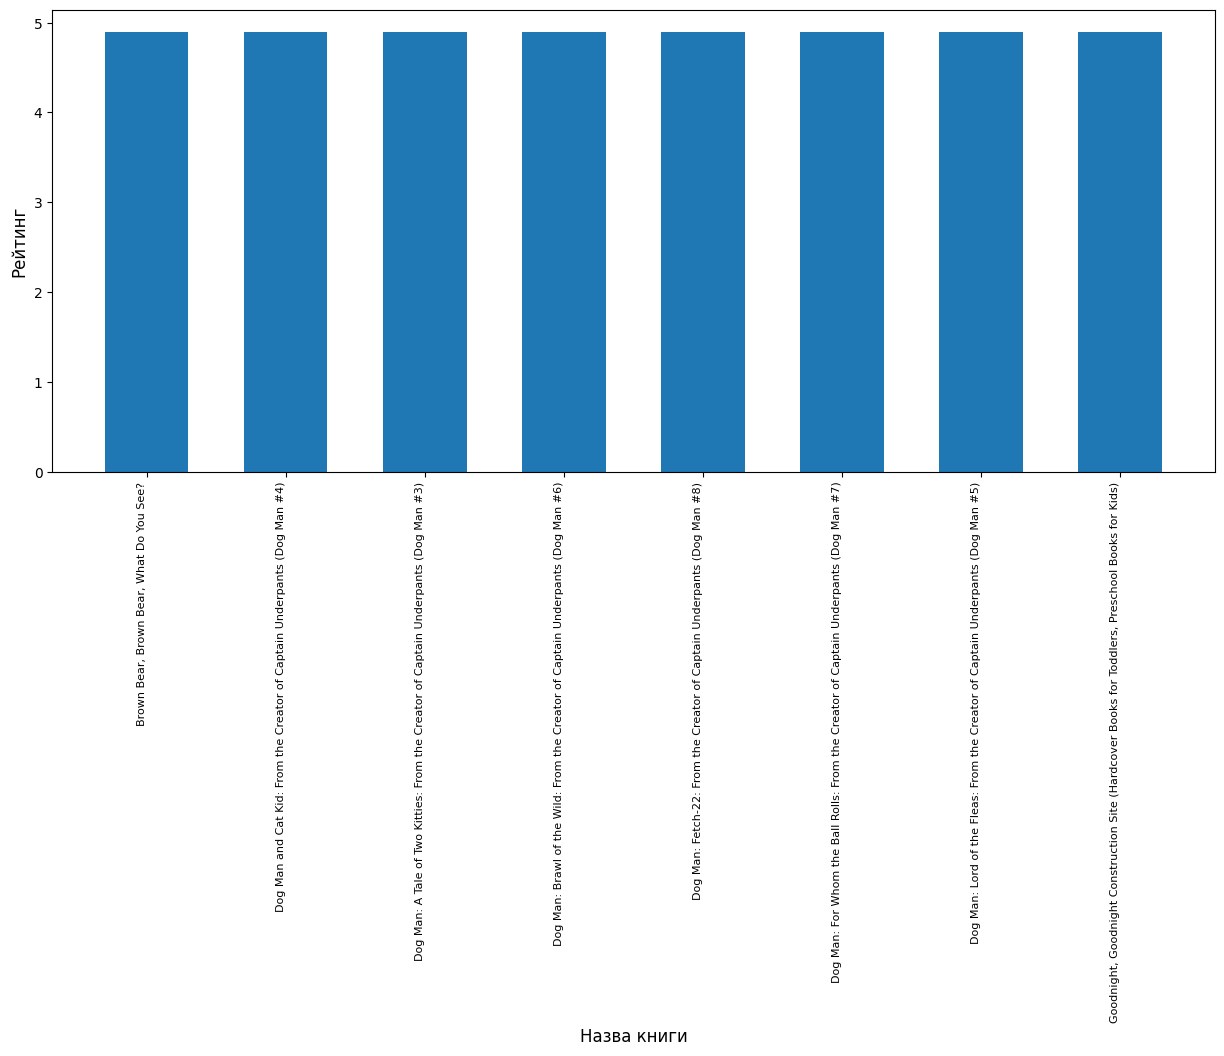

In [59]:
top_10_books = df.nlargest(10, "user_rating")

plt.figure(figsize=(15, 6))
plt.bar(top_10_books["name"], top_10_books["user_rating"], width=0.6)

plt.xticks(rotation=90, ha="right", fontsize=8)

plt.xlabel("Назва книги", fontsize=12)
plt.ylabel("Рейтинг", fontsize=12)

plt.tight_layout()
plt.show()

Побудуйте матрицю кореляції для стовпчиків 'user_rating', 'reviews', 'price'.

In [52]:
correlation_matrix = df[['user_rating', 'reviews', 'price']].corr()
print("\nМатриця кореляції:")
print(correlation_matrix)


Матриця кореляції:
             user_rating   reviews     price
user_rating     1.000000 -0.001729 -0.133086
reviews        -0.001729  1.000000 -0.109182
price          -0.133086 -0.109182  1.000000
